In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from importlib import reload

import sys
sys.path.append("../../include")
import hhtools
import hhsignal

In [20]:
# Load data
def load(fname):
    import pickle as pkl
    with open(fname, "rb") as fp:
        return pkl.load(fp)

summary_obj = load("../simulation_data/orders.pkl")["obj"]
summary_obj.fdir = "../simulation_data/data"
repr_points = load("../clustering/data/cluster_repr_points_rank3.pkl")

# Set explanable frequency threshold

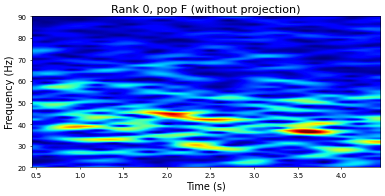

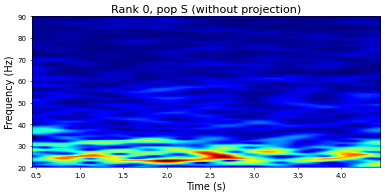

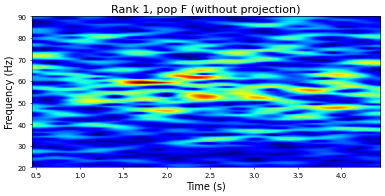

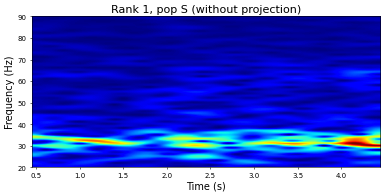

In [77]:
# show independent
pop_type = ["", "F", "S"]
for nrank in range(2):
    # Show data
    detail_data = summary_obj.load_detail(*[0,0,nrank,0,0])

    # get spectrogram
    for tp in range(1, 3):
        psd, fpsd, tpsd = hhsignal.get_stfft(detail_data["vlfp"][tp], detail_data["ts"], 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

        plt.figure(figsize=(9, 4), dpi=50)
        hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet", interpolation="spline16")
        plt.ylim([20, 90])
        plt.xlabel("Time (s)", fontsize=14)
        plt.ylabel("Frequency (Hz)", fontsize=14)
        plt.title("Rank %d, pop %s (without projection)"%(nrank, pop_type[tp]), fontsize=16)
        
        plt.savefig("./figs/no_proj_spectrogram_rank%d_pop%s"%(nrank, pop_type[tp]), dpi=150)
        
        plt.show()

In [193]:
# we can define no-mans area : rank0: 27-32 (give the same area for slow and fast frequency oscillation)

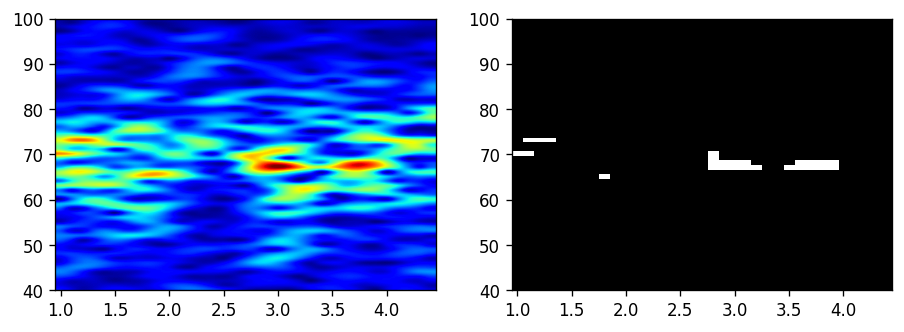

In [216]:
def get_pth_percentile(vec, q):
    return np.sort(vec)[int(q/100*len(vec))]


def cut_start(data, t):
    # data (time)
    # t: s unit
    
    tcut = 500
    # cut before 500ms
    idt = t > 0.5
    return data[idt], t[idt]

# test
vlfp, t = cut_start(detail_data["vlfp"][1], detail_data["ts"])
psd, fpsd, tpsd = hhsignal.get_stfft(vlfp, t, 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

yl = [40, 100]

plt.figure(figsize=(9, 3), dpi=120)

plt.subplot(121)
hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet", interpolation="spline16")
plt.ylim(yl)

plt.subplot(122)
pth = get_pth_percentile(psd.flatten(), 99.5)
hhtools.imshow_xy(psd>=pth, x=tpsd, y=fpsd, cmap="gray", interpolation="none")
plt.ylim(yl)

plt.show()

In [209]:
pth

0.008186121557037402

In [200]:
t[0], t[-1]

(0.5005, 4.9995)

In [198]:
tpsd[-1]

3.9

In [197]:
tpsd[0]

0.5

In [116]:
def get_pth(vec, q):
    return np.sort(vec)[int(q/100*len(vec))]

def get_arr_th(arr2d, q):
    # run for each row
    ncol = arr2d.shape[1]
    th_set = []
    for n in range(arr2d.shape[0]):
        th_set.append(get_pth(arr2d[n, :], q))
    return get_pth(th_set, q)

In [123]:
psd, fpsd, tpsd = hhsignal.get_stfft(detail_data["vlfp"][1], detail_data["ts"], 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

In [127]:
def get_arr_th(arr2d, q):
    # run for each row
    ncol = arr2d.shape[1]
    th_set = []
    for n in range(arr2d.shape[0]):
        th_set.append(get_pth(arr2d[n, :], q))
    return th_set

th_set = get_arr_th(psd, 95)

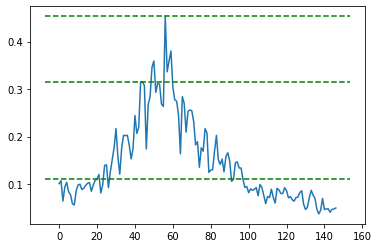

In [129]:
plt.figure()
plt.plot(th_set)
xl = plt.xlim()
plt.plot(xl, [np.median(th_set)]*2, 'g--')
plt.plot(xl, [np.max(th_set)]*2, 'g--')
plt.plot(xl, [get_pth(th_set, 95)]*2, 'g--')
plt.show()

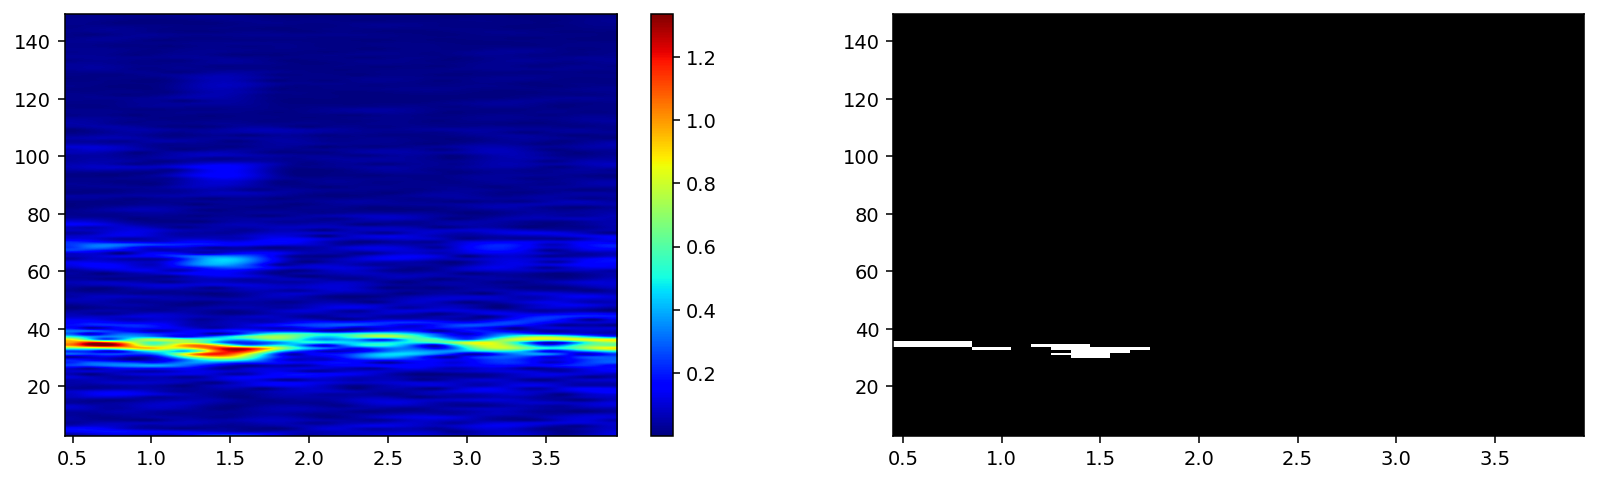

In [192]:
detail_data = summary_obj.load_detail(*[0,0,2,0,0])

idt = detail_data["ts"] >= 0.5
t = detail_data["ts"][idt]
data = detail_data["vlfp"][2][idt]
psd, fpsd, tpsd = hhsignal.get_stfft(data, t, 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

norm_psd = (psd - np.average(psd, axis=0)) / np.std(psd, axis=0)
pth = get_pth(psd.flatten(), 99.5)

plt.figure(figsize=(14, 4), dpi=140)
plt.subplot(121)
hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet", interpolation="spline16")
plt.colorbar()

plt.subplot(122)
hhtools.imshow_xy(psd >= pth, x=tpsd, y=fpsd, cmap="gray", interpolation="none")
plt.show()

In [187]:
print(pth)
m = np.average(psd)
s = np.std(psd)

print(m + 5*s)

0.8878789876894808
0.7449250673461771


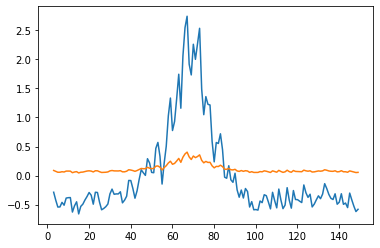

In [178]:
plt.plot(fpsd, np.average(norm_psd, axis=1))
plt.plot(fpsd, np.average(psd, axis=1))

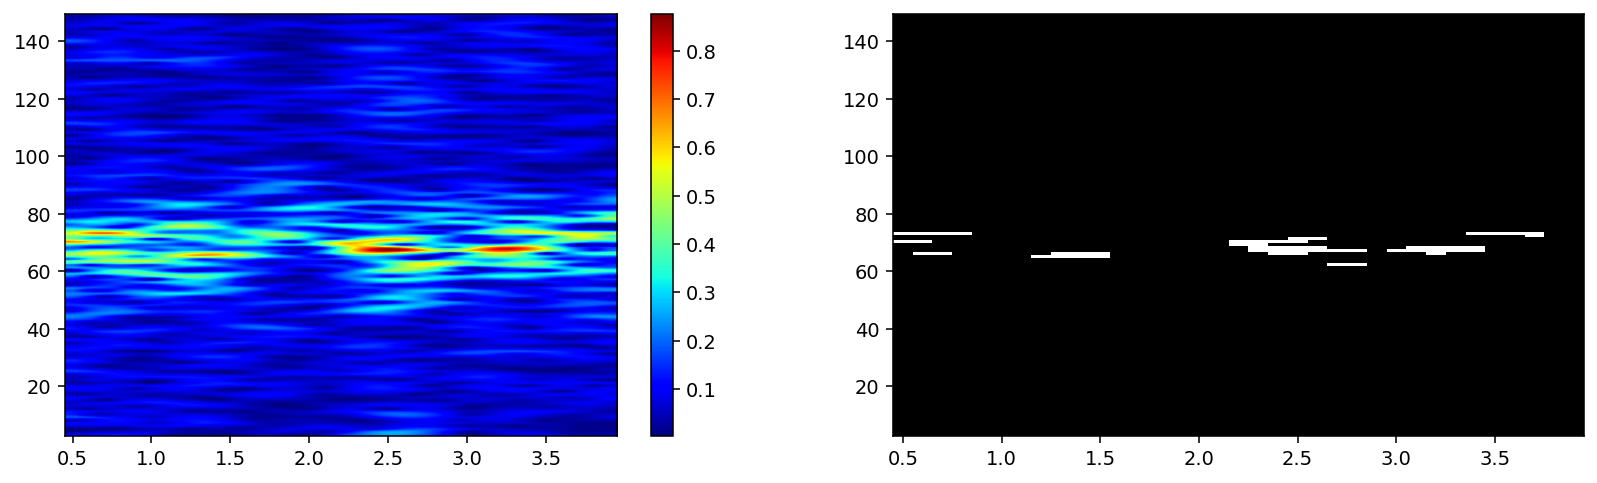

In [181]:
detail_data = summary_obj.load_detail(*[0,0,2,0,0])

idt = detail_data["ts"] >= 0.5
t = detail_data["ts"][idt]
data = detail_data["vlfp"][1][idt]
psd, fpsd, tpsd = hhsignal.get_stfft(data, t, 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

norm_psd = (psd - np.average(psd, axis=0)) / np.std(psd, axis=0)
pth = get_pth(psd.flatten(), 99)

plt.figure(figsize=(14, 4), dpi=140)
plt.subplot(121)
hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet", interpolation="spline16")
plt.colorbar()

plt.subplot(122)
hhtools.imshow_xy(psd >= pth, x=tpsd, y=fpsd, cmap="gray", interpolation="none")
plt.show()

In [149]:
pth

4.130158573415768

In [137]:
def get_arr_th(arr2d, q):
    # run for each row
    ncol = arr2d.shape[1]
    th_set = []
    for n in range(arr2d.shape[0]):
        th_set.append(get_pth(arr2d[n, :], q))
    return get_pth(th_set, 85)

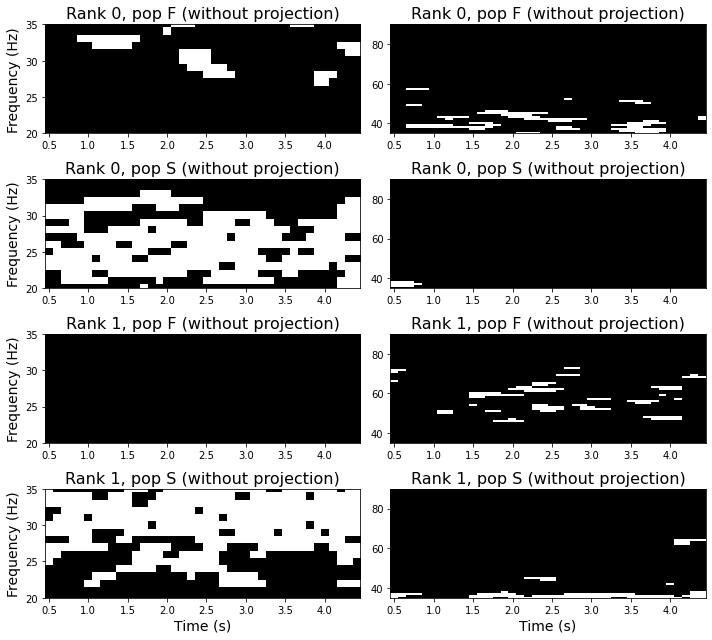

In [138]:
freq_th = 35

show_upper_case = True

plt.figure(figsize=(10, 9))
for nrank in range(2):
    # Show data
    detail_data = summary_obj.load_detail(*[0,0,nrank,0,0])

    # get spectrogram
    for tp in range(1, 3):
        # use data from 500 ms
        idt = detail_data["ts"] >= 0.5
        t = detail_data["ts"][idt]
        data = detail_data["vlfp"][to][:, idt]
        
        psd, fpsd, tpsd = hhsignal.get_stfft(data, t, 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))
        
        # normalize
        norm_psd = (psd - np.average(psd, axis=0))
        
        # get threshold
        # q95 = np.sort(pflat)[int(0.9 * len(pflat))]
        q95 = get_arr_th(psd, 95)
        
        if show_upper_case:
            psd = psd >= q95
            interp = "none"
            cmap = "gray"
        else:
            interp = "spline16"
            cmap = "jet"
        
        for i in range(2):
            r = (2*nrank+tp-1)
            plt.subplot(4, 2, 2*r+i+1)
        
            hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap=cmap, interpolation=interp)
            plt.title("Rank %d, pop %s (without projection)"%(nrank, pop_type[tp]), fontsize=16)
            
            if r == 3:
                plt.xlabel("Time (s)", fontsize=14)
            if i == 0:
                plt.ylabel("Frequency (Hz)", fontsize=14)
            
            if i == 0:
                plt.ylim([20, freq_th])
            elif i == 1:
                plt.ylim([freq_th, 90])

plt.tight_layout()
plt.show()

(3, 14, 0, 3)


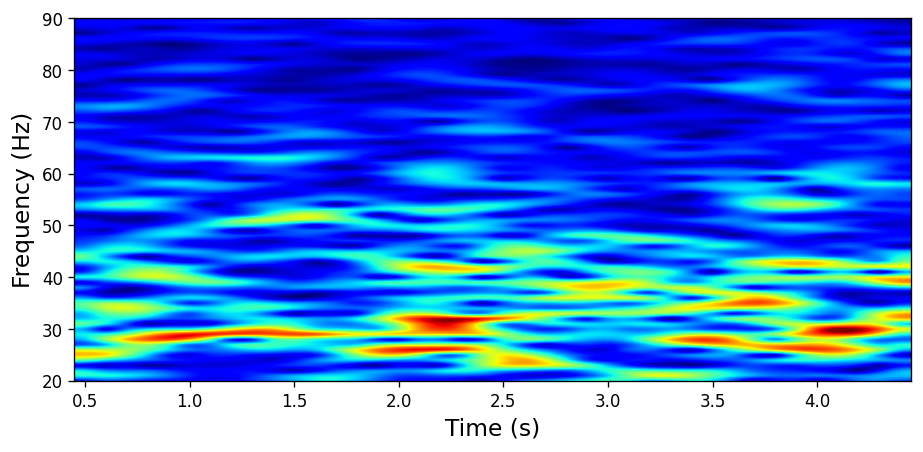

In [64]:
# Show data
target_cid = 4 # from 1 to K

nid = repr_points["loc_points"][target_cid-1][0]
print(nid)
detail_data = summary_obj.load_detail(*nid, 0)

# get spectrogram
i = 1
psd, fpsd, tpsd = hhsignal.get_stfft(detail_data["vlfp"][i], detail_data["ts"], 2000, mbin_t=0.1, wbin_t=1, frange=(3, 150))

plt.figure(figsize=(9, 4), dpi=120)
hhtools.imshow_xy(psd, x=tpsd, y=fpsd, cmap="jet", interpolation="spline16")
plt.ylim([20, 90])
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Frequency (Hz)", fontsize=14)
plt.show()